# 머신러닝순서
1. 데이터 불러오기
2. 종속변수 숫자로 변경
3. 독립변수, 종속변수 나누기
4. 훈련, 테스트 데이터 나누기
5. 스케일링 (정규화)
6. 모델 생성
7. 모델 평가

# 데이터 불러오기

In [1]:
import pandas as pd
fish = pd.read_csv("./data/05_생선_분류_데이터셋.csv")
fish.info()
fish.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


# 종속변수 숫자로 변경

In [2]:
species_dic = {
    "Perch" : 0, 
    "Bream" : 1, 
    "Roach" : 2, 
    "Pike" : 3, 
    "Smelt" : 4, 
    "Parkki" : 5, 
    "Whitefish" : 6, 
}
fish["Species"] = fish["Species"].map(species_dic)
fish["Species"].value_counts()

Species
0    56
1    35
2    20
3    17
4    14
5    11
6     6
Name: count, dtype: int64

# 독립변수, 종속변수 나누기

In [3]:
# 위 아래 편한거 1개 쓰기 
X = fish.iloc[:,1:]
y = fish["Species"]
X.shape, y.shape

X = fish[["Weight", "Length", "Diagonal", "Height", "Width"]]     # [] 가 2중으로 되어있음 2차원 행렬이라서
y = fish["Species"]
X.shape, y.shape

((159, 5), (159,))

# 훈련, 테스트 데이터 나누기

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링 (정규화)

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

# 모델 생성

In [6]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
rf = RandomForestClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
hgb = HistGradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

model_list = [rf, et, gb, hgb, xgb]

# 훈련 평가

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for model in model_list:
    model_name = model.__class__.__name__
    model.fit(X_train_scaled, y_train)
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    train_acc = model.score(X_train_scaled, y_train)
    test_acc = model.score(X_test_scaled, y_test)
    pre = precision_score(y_test, test_pred, average="micro")
    rec = recall_score(y_test, test_pred, average="micro")
    f1 = f1_score(y_test, test_pred, average="micro")
    print(model_name)
    print(train_acc, test_acc, train_acc - test_acc)
    print(test_acc, pre, rec, f1)
    print("-----------------------------------------")

RandomForestClassifier
1.0 0.8125 0.1875
0.8125 0.8125 0.8125 0.8125
-----------------------------------------
ExtraTreesClassifier
1.0 0.84375 0.15625
0.84375 0.84375 0.84375 0.84375
-----------------------------------------
GradientBoostingClassifier
1.0 0.8125 0.1875
0.8125 0.8125 0.8125 0.8125
-----------------------------------------
HistGradientBoostingClassifier
0.9448818897637795 0.78125 0.16363188976377951
0.78125 0.78125 0.78125 0.78125
-----------------------------------------
XGBClassifier
1.0 0.75 0.25
0.75 0.75 0.75 0.75
-----------------------------------------


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
import matplotlib.pyplot as plt

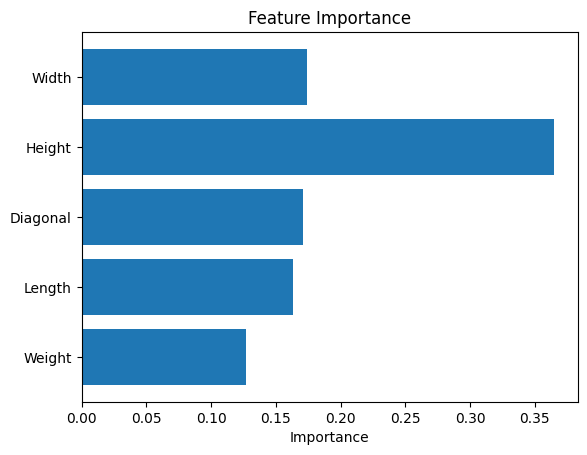

In [13]:
# 변수 중요도 추출
feature_importances = rf.feature_importances_

# 시각화
plt.barh(X.columns, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()